In [1]:
import sys
sys.path.append("../") # go to parent dir

import jax
import jax.numpy as jnp
import numpy as np
from matplotlib import pyplot as plt
import module.finite_differences as finite

import optax
from tqdm import tqdm

from scipy.optimize import curve_fit

In [12]:
Ns = jnp.arange(5, 50)

In [13]:
result = []
errs = []

In [14]:
for N in tqdm(Ns):
    solver = finite.Solver(N, L = 2)
    xx = solver.xx
    yy = solver.yy
    dims = (solver.N, solver.N)
    mask = np.ones(dims)
    mask[1:-1,1:-1] = 0
    maskx = np.ones(dims)
    maskx[:,1:-1] = 0
    masky = np.ones(dims)
    masky[1:-1,:] = 0
    mask = jnp.array(mask)
    ii, jj = jnp.meshgrid(jnp.arange(solver.N), jnp.arange(solver.N))
    a = 1.4
    index_decay = jnp.exp(-(ii+jj)/a)


    k_init = (xx + 1) + 3


    dirichlet = (yy + 1) * jnp.log((xx + 1) + 3)
    dirichlet *= mask


    sol = solver.solve(k_init, dirichlet)

    T_sol = (yy + 1) * jnp.log((xx + 1) + 3)
    errs.append(jnp.mean(jnp.abs(T_sol  - sol)))

100%|██████████| 45/45 [00:41<00:00,  1.09it/s]


In [22]:
def f(x, a, b):
    return -a*x  + b

res = curve_fit(f, np.log(Ns), np.log(errs))

In [27]:
a = res[0][0]
b = jnp.exp(res[0][1])

In [28]:
a,b

(2.41888201249767, Array(0.00564919, dtype=float64))

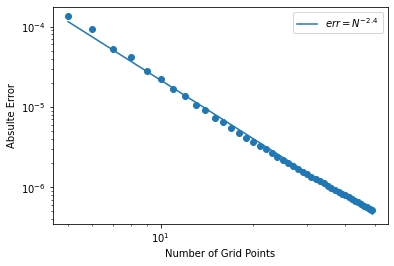

In [31]:
plt.figure(figsize=(6,4))
plt.scatter(Ns, errs)
plt.plot(Ns, jnp.exp(f(np.log(Ns), res[0][0], res[0][1])), label = "$err = N^{-2.4} $")
plt.yscale("log")
plt.xscale("log")
# plt.xticks(Ns)
plt.xlabel("Number of Grid Points")
plt.ylabel("Absulte Error")
plt.legend()
plt.savefig("../plot/finite_accuracy.pdf")